In [9]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from PIL import Image
import seaborn as sns
import numpy as np

In [10]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=True)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [6]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
y_train.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: class, dtype: int64

C:\Users\A.Miri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

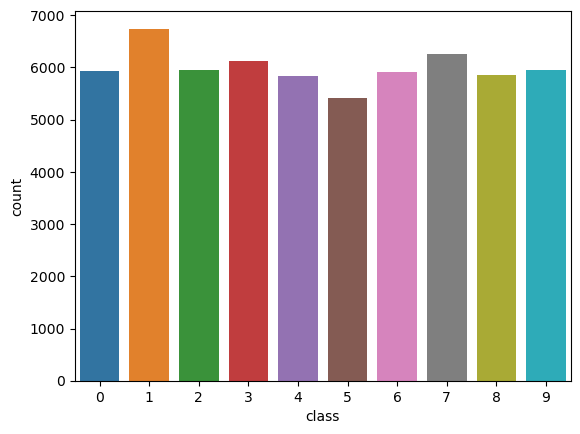

In [13]:
sns.countplot(y_train)

In [15]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

# Training by Linear SVC

In [16]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

C:\Users\A.Miri\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

# predictions on the training set and measure the accuracy

In [17]:
y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8348666666666666

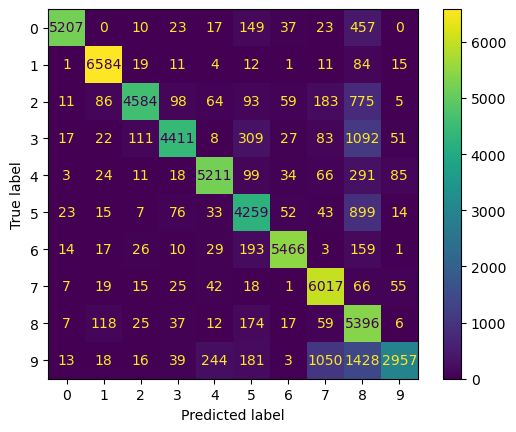

In [18]:
metrics.ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

# Fit SVC on scaled data

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [20]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

C:\Users\A.Miri\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [21]:
y_pred_scaled = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred_scaled)

0.9214

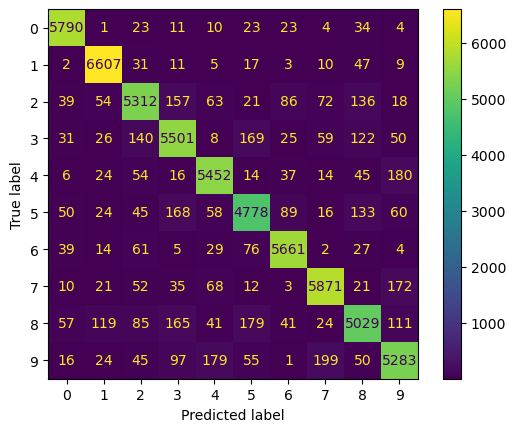

In [22]:
metrics.ConfusionMatrixDisplay.from_predictions(y_train, y_pred_scaled)

# If we want to use an SVM, we will have to use a kernel. Let's try an SVC with an RBF kernel (the default).

In [23]:
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC()

# prediction on scaled train data and measure it's scores (accuracy)

In [24]:
y_pred_scaled = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred_scaled)

0.9455333333333333

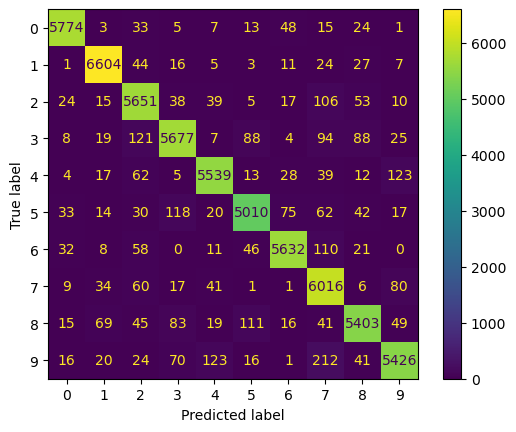

In [25]:
metrics.ConfusionMatrixDisplay.from_predictions(y_train, y_pred_scaled)

# Tuning the hyperparameters by doing a randomized search with cross validation.
# We will do this on a small dataset just to speed up the process:

In [26]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}

rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:10000], y_train[:10000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=7.784771601024662, gamma=0.049454823519922114; total time= 1.5min
[CV] END ....C=7.784771601024662, gamma=0.049454823519922114; total time= 1.4min
[CV] END ....C=7.784771601024662, gamma=0.049454823519922114; total time= 1.4min
[CV] END ...C=7.637151720318922, gamma=0.0011276801027351642; total time=  23.0s
[CV] END ...C=7.637151720318922, gamma=0.0011276801027351642; total time=  22.9s
[CV] END ...C=7.637151720318922, gamma=0.0011276801027351642; total time=  22.9s
[CV] END ....C=7.73942174693125, gamma=0.0020536855568513528; total time=  29.9s
[CV] END ....C=7.73942174693125, gamma=0.0020536855568513528; total time=  29.1s
[CV] END ....C=7.73942174693125, gamma=0.0020536855568513528; total time=  30.6s
[CV] END ....C=2.139475550215223, gamma=0.011654778145138187; total time= 1.3min
[CV] END ....C=2.139475550215223, gamma=0.011654778145138187; total time= 1.3min
[CV] END ....C=2.139475550215223, gamma=0.011654

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001A321C69FD0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001A32230CA60>},
                   verbose=2)

In [27]:
rnd_search_cv.best_estimator_

SVC(C=7.637151720318922, gamma=0.0011276801027351642)

In [28]:
rnd_search_cv.best_score_

0.9401998688171157

In [29]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=7.637151720318922, gamma=0.0011276801027351642)

In [30]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.998

# Testing the modle on the test set:

In [31]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9732

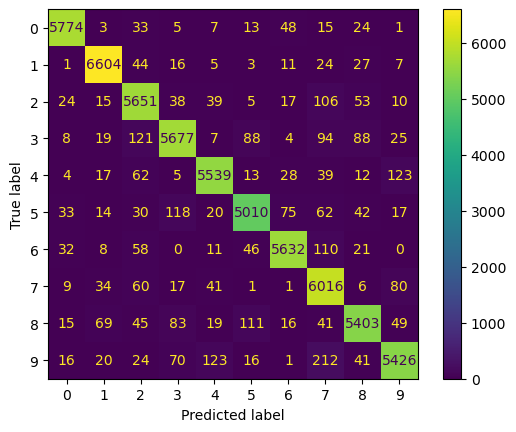

In [32]:
metrics.ConfusionMatrixDisplay.from_predictions(y_train, y_pred_scaled)

In [33]:
print(X_train.shape)
print(X_train_scaled.shape)

(60000, 784)
(60000, 784)


In [34]:
image= mnist.data

In [35]:
import matplotlib.pyplot as plt

In [36]:
image_index = 0 

def show_image(image_index, x_show, y_show):
    print('label =', y_show[image_index])
    plt.imshow(x_show[image_index].reshape(28, 28, 1), cmap='gray')

# Ploting scaled data

label = 5


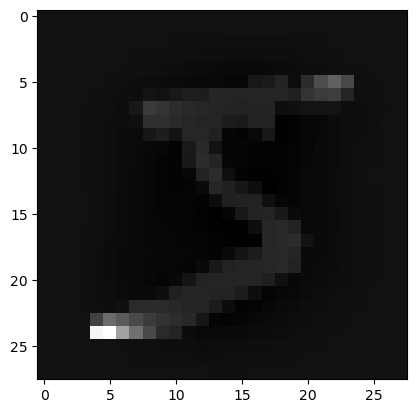

In [37]:
show_image(0, X_train_scaled, y_train)

# Ploting original data

label = 5


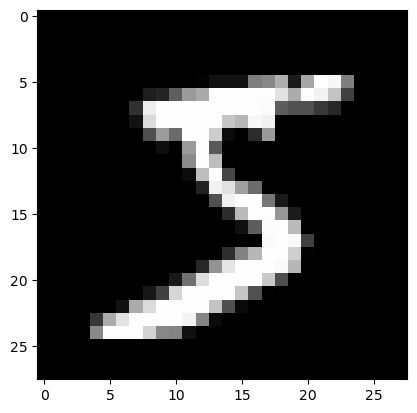

In [38]:
show_image(0, X_train, y_train)

In [39]:
predicted = rnd_search_cv.best_estimator_.predict(X_test_scaled)

print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.94      0.97      0.96      1028
           8       0.97      0.96      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



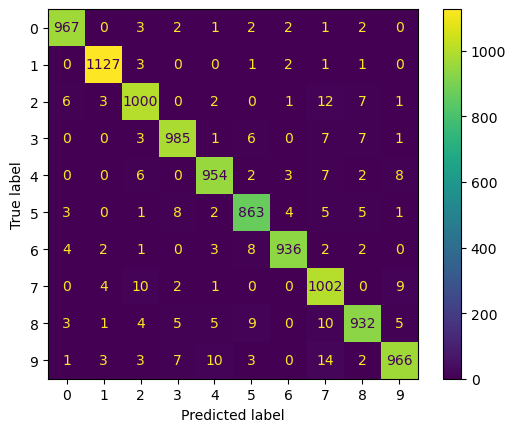

In [40]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)

# predicting on my own hand writing

In [41]:
im = Image.open("22.jpg").resize((28,28))

C:\Users\A.Miri\AppData\Local\Temp\ipykernel_12108\535687050.py:1: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  im.resize((100,100), resample=Image.NEAREST)


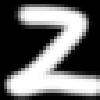

In [42]:
im.resize((100,100), resample=Image.NEAREST)

In [43]:
np_im = np.array(im)

In [44]:
np_im.shape

(28, 28)

In [45]:
preprocessed_img = np_im.astype(np.float32)

In [46]:
preprocessed_img.flatten()[None].shape

(1, 784)

In [47]:
rnd_search_cv.best_estimator_.predict(preprocessed_img.flatten()[None])

array([7], dtype=uint8)

## ** The prediction is 7 but it is a clear 2 ;)